In [29]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
connectionist_bench_sonar_mines_vs_rocks = fetch_ucirepo(id=151)

# data (as pandas dataframes)
X = connectionist_bench_sonar_mines_vs_rocks.data.features
y = connectionist_bench_sonar_mines_vs_rocks.data.targets

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split

In [31]:
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute51,Attribute52,Attribute53,Attribute54,Attribute55,Attribute56,Attribute57,Attribute58,Attribute59,Attribute60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094


In [32]:
X = X.iloc[:, :-1].values
y = y.iloc[:, -1].values

In [33]:
y = np.where(y == 'R', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


In [34]:
# chuẩn hóa dữ liệu

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [35]:
# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=6)

## Tự xây dựng bằng numpy

In [43]:
import numpy as np
import numpy as np
from cvxopt import matrix, solvers

class SVM():
    def __init__(self):
        self.has_fitted = False
        self.sp_v_threshold = 1e-8
        self.sp_v_i = []

    def fit(self, X, y):
        assert len(X) > 0, "Please input at least one sample"

        n = len(X)
        dim = len(X[0])

        self.P = np.identity(dim + 1)
        self.q = np.zeros((dim + 1,))
        self.G = np.zeros((n, dim + 1))
        self.h = -np.ones((n,))

        self.P[0, 0] = 0
        for i in range(n):
            self.G[i, 0] = -y[i]
            self.G[i, 1:] = -X[i, :] * y[i]

        sol = solvers.qp(matrix(self.P),
                         matrix(self.q),
                         matrix(self.G),
                         matrix(self.h)
                         )

        self.w = np.zeros(dim,)
        self.b = sol["x"][0]
        for i in range(1, dim + 1):
            self.w[i - 1] = sol["x"][i]

        for i in range(n):
            v = y[i] * (np.dot(self.w, X[i]) + self.b)
            if v < (1 + self.sp_v_threshold):
                self.sp_v_i.append(i)
        self.has_fitted = True
        return self.w, self.b

    def predict(self, X):
        assert self.has_fitted, "Model has not been trained"
        return np.sign(np.dot(self.w, X.T) + self.b)

# Initialize and train Hard Margin SVM model
hard_margin_svm_model = SVM()
hard_margin_svm_model.fit(X_train, y_train)

# Make predictions
predictions = hard_margin_svm_model.predict(X_test)
print(predictions)

[-1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1. -1.  1.  1.  1.  1.
  1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.
 -1.  1.  1.  1.  1. -1.]


In [44]:
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

# Assume y_test contains true labels and predictions contains predicted labels
acc = accuracy(y_test, predictions)
print("Accuracy:", acc)

Accuracy: 0.6904761904761905


## Sử dụng thư viện

In [38]:
# Train SVM with hard margin
clf = svm.SVC(kernel='linear', C=100)
clf.fit(X_train, y_train)

# Print the accuracy of the model
print("Accuracy on test data: ", clf.score(X_test, y_test))

Accuracy on test data:  0.6904761904761905


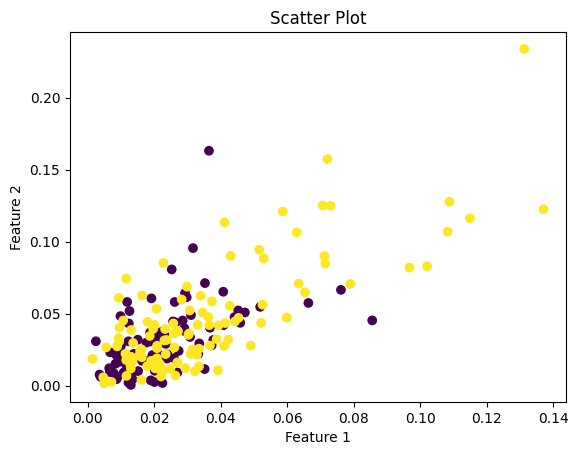

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot')
plt.show()

In [12]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(10)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 100
X0 = np.random.multivariate_normal(means[0], cov, N)  # class 1
X1 = np.random.multivariate_normal(means[1], cov, N)  # class -1
X = np.concatenate((X0.T, X1.T), axis=1)  # all data
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis=1)  # labels

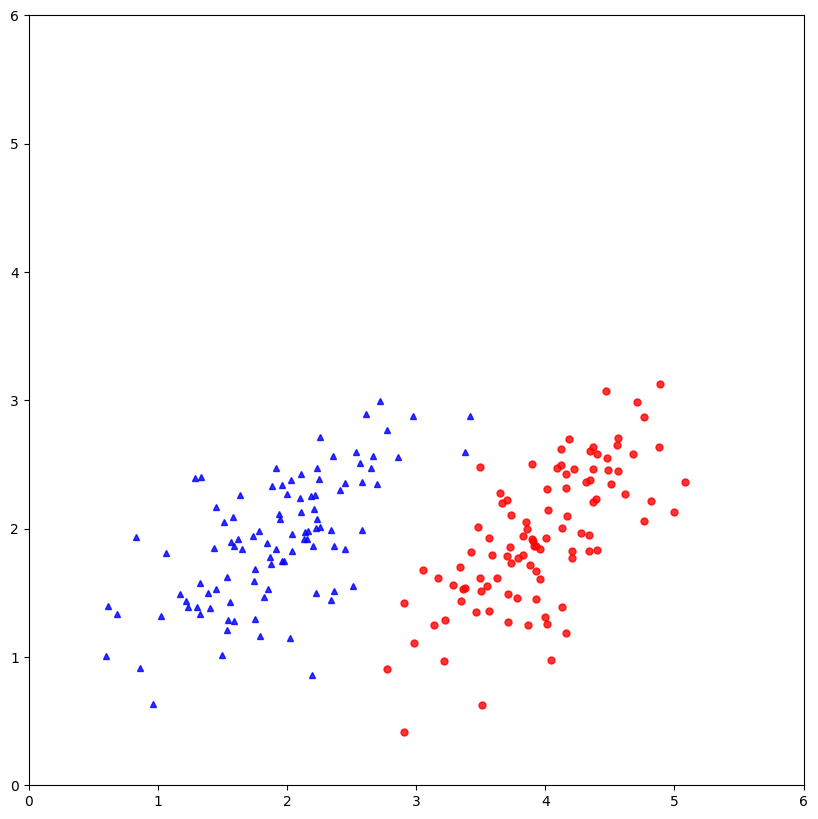

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
ani = plt.cla()
# plot points
ani = plt.plot(X0.T[0, :], X0.T[1, :], 'b^', markersize=5, alpha=.8)
ani = plt.plot(X1.T[0, :], X1.T[1, :], 'ro', markersize=5, alpha=.8)
ani = plt.axis([0, 6, 0, 6])
plt.show()

In [14]:
from cvxopt import matrix, solvers

# build P ~ K
V = np.concatenate((X0.T, -X1.T), axis=1)
P = matrix(V.T.dot(V))  # P ~ K in slide see definition of V, K near eq (8)
q = matrix(-np.ones((2*N, 1)))  # all-one vector
# build A, b, G, h
# for all lambda_n >= 0! note that we solve -g(lambda) -> min
G = matrix(-np.eye(2*N))
h = matrix(np.zeros((2*N, 1)))
A = matrix(y)  # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1)))
solvers.options['show_progress'] = False
sol = solvers.qp(P, q, G, h, A, b)
l = np.array(sol['x'])  # lambda
print('lambda = ')
print(l.T)

lambda = 
[[6.43830372e-10 4.72988123e-10 6.96301261e-10 5.79332567e-10
  5.85394979e-10 5.88997480e-10 4.89184241e-10 5.67664894e-10
  4.93959294e-10 8.11159682e-10 7.35998382e+01 5.84752419e-10
  6.33981206e-10 5.70452608e-10 5.33265242e-10 6.21992621e-10
  6.30547706e-10 6.42898737e-10 6.23309373e-10 7.19237900e-10
  6.37162151e-10 5.62750934e-10 5.43352984e-10 5.34317125e-10
  6.12473191e-10 5.54489279e-10 5.15178968e-10 6.11949009e-10
  7.11337568e-10 6.01640553e-10 6.16174828e-10 7.08582794e-10
  6.28907978e-10 9.47883550e-10 5.60470453e-10 5.73546044e-10
  5.40206464e-10 5.84839273e-10 4.52413498e-10 5.71685468e-10
  6.69868839e-10 4.47707836e-10 3.99526097e-10 5.50379371e-10
  8.79639914e-10 6.28698683e-10 6.73190935e-10 6.03403938e-10
  5.36740042e-10 1.22567795e-09 8.50987129e-10 4.93131967e-10
  6.05327442e-10 5.32588255e-10 7.14356409e-10 6.36992251e-10
  7.63436068e-10 5.89166800e-10 5.36104164e-10 9.45023473e-10
  6.67949637e-10 6.12129203e-10 6.46493582e-10 6.24525894e-1

In [15]:
epsilon = 1e-6  # just a small number, greater than 1e-9, to filter values of lambda
S = np.where(l > epsilon)[0]
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
lS = l[S]
# calculate w and b
w = VS.dot(lS)
w0 = np.mean(yS.T - w.T.dot(XS))
print('W = ', w.T)
print('W0 = ', w0)

W =  [[-10.10601344   6.8886009 ]]
W0 =  17.241417859321018


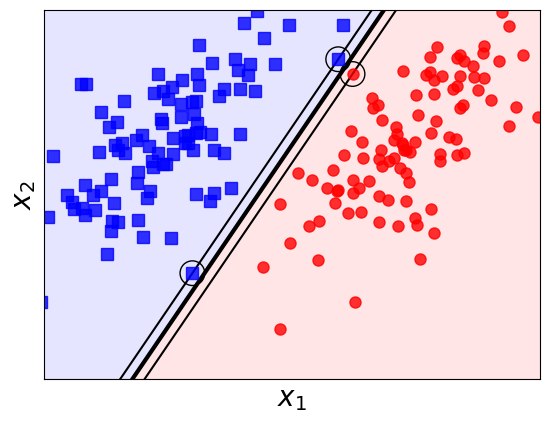

In [16]:
from matplotlib.backends.backend_pdf import PdfPages
# draw
# plot points
fig, ax = plt.subplots()
x1 = np.arange(-10, 10, 0.1)
y1 = -w[0, 0]/w[1, 0]*x1 - w0/w[1, 0]
y2 = -w[0, 0]/w[1, 0]*x1 - (w0-1)/w[1, 0]
y3 = -w[0, 0]/w[1, 0]*x1 - (w0+1)/w[1, 0]
plt.plot(x1, y1, 'k', linewidth = 3)
plt.plot(x1, y2, 'k')
plt.plot(x1, y3, 'k')
y4 = 10*x1
plt.plot(x1, y1, 'k')
plt.fill_between(x1, y1, color='red', alpha=0.1)
plt.fill_between(x1, y1, y4, color = 'blue', alpha = 0.1)
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.axis('equal')
plt.ylim(0, 3)
plt.xlim(2, 4)
# hide tikcs
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
# add circles around support vectors
for m in S:
    circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
    ax.add_artist(circle)

plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

plt.show()

# Nhận xét
Độ chính xác của chương trình tự xây và thư viện (C = 1000) tương đương nhau, khoảng 69% chưa thực sự tốt. Nguyên nhân dẫn đến kết quả này là do dữ liệu không tách được tuyến tính, mà SVM-hard margin chỉ thực sự tốt khi dữ liệu tách được tuyến tính.
Khi sử dụng thư viện vô hình cho độ chính xác tốt hơn khi điều chỉnh tham số C nhỏ (sử dụng soft margin) cho phép mô hình chấp nhận một số lỗi khi phân tách dữ liệu. Tuy nhiên kết quả vẫn chưa thực sự cao kết quả có thể lên tới 76% khi C = 50. Một nguyên nhân có thể dẫn đến đều này là do dữ liệu không tách được tuyến tính và cũng ko gần tách được tuyến tính